# **Futuro Use - Definir Matriz Principal**

In [1]:
import numpy as np
import sys
from scipy import linalg
import pandas as pd


pd.options.display.max_columns = None
np.set_printoptions(precision=15,suppress=False,threshold=sys.maxsize)

## parametros do teste n = tamanho da amostra, ini = x0 e fim = xn
n = 29

## Definindo os vetores com dados de tempo e espaco
t = np.arange(30)
x = np.array([0.0, 1, 2.4, 4.1, 6, 8.2, 10.6, 13.4, 16.4, 19.7,23.3, 27, 31.2, 35.5, 40.1, 45, 50.2, 55.6, 61.3, 67.3,73.6, 80.1, 86.9, 94, 101.3, 109, 116.9, 125, 133.4, 142.1])

ini = (  ( (x[2]-x[1])/(t[2]-t[1]) ) - ( (x[1]-x[0])/(t[1]-t[0]) )  ) / (t[2]-t[0]) ##x0
fim = (  ( (x[n-1]-x[n-2]) / (t[n-1]-t[n-2]) ) - ( (x[n-2]-x[n-3]) / (t[n-2]-t[n-3]) ) ) / (t[n-1]-t[n-3]) ##xn

print ("Vetor t",t)
print ("Vetor x",x)

## Definindo vetor h(i+1)
h=np.empty(n, dtype = np.float64)

for i in range(0,n-1):
  h[i+1] = t[i+1]-t[i]

print ("Vetor h", h)

## definindo os valores de mi, lambda e d

##mi 
mi = np.empty(n,dtype = np.float64)
mi[n-1] = 0

for i in range(0,n-1):
  mi[i]= h[i]/(h[i]+h[i+1])

print ("Vetor mi", mi)

##lambda

lambida = np.empty(n,dtype = np.float64)
lambida[0] = 0

for i in range(1,n):
    lambida[i] = h[i]/(h[i-1]+h[i])

print ("Vetor lambda", lambida)

## d 
d = np.empty(n+1,dtype = np.float64)
d[0]=2*ini
d[n]=2*fim

for i in range(1,n):
  d[i]= (6/(h[i-1]+h[i]))*(    ((x[i+1]-x[i])/(h[i])) - ((x[i]-x[i-1])/h[i])      )

print ("Vetor D", d)

## Criando a Matriz A 
dimensao = (n+1,n+1)
A = np.zeros(dimensao,dtype = np.float64)

for i in range(0,n+1):
  for j in range (0,n+1):
    if(i==j):
      A[i,j] = 2

for i in range(0,n+1):
  for j in range (0,n+1):
    if(i==j+1):
      A[i,j] = mi[j]
    if(j==i+1):
      A[i,j] = lambida[i]
print(A)



Vetor t [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Vetor x [  0.    1.    2.4   4.1   6.    8.2  10.6  13.4  16.4  19.7  23.3  27.
  31.2  35.5  40.1  45.   50.2  55.6  61.3  67.3  73.6  80.1  86.9  94.
 101.3 109.  116.9 125.  133.4 142.1]
Vetor h [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
Vetor mi [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0. ]
Vetor lambda [0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Vetor D [0.4               1.2               0.899999999999999 0.600000000000002
 0.899999999999997 0.600000000000003 1.200000000000001 0.599999999999993
 0.900000000000007 0.900000000000002 0.299999999999994 1.5
 0.300000000000004 0.900000000000002 0.899999999999991 0.900000000000013
 0.599999999999987 0.899999999999991 0.900000000000013 0.89999999

In [0]:
##Printando o Output da Definição da Matrix com o Pandas (Melhor Visualização)

pd.set_option('precision', 1)

df = pd.DataFrame(A)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Definir Matriz Teste**

In [0]:
import numpy as np
import sys
from scipy import linalg

np.set_printoptions(precision=15,suppress=False,threshold=sys.maxsize)
## parametros do teste n = tamanho da amostra, ini = x0 e fim = xn
n = 10
ini = 2 ##x0
fim = 2 ##xn

## Definindo os vetores com dados de tempo e espaco
t = np.arange(0, 1.1, 0.1, dtype = np.float64)
x = np.array([2.00, 1.81, 1.64, 1.49, 1.36, 1.25, 1.16, 1.09, 1.04, 1.01, 1.00], dtype = np.float64)

x0 = (  ( (x[2]-x[1])/(t[2]-t[1]) ) - ( (x[1]-x[0])/(t[1]-t[0]) )  ) / (t[2]-t[0])
xn = (  ( (x[n-1]-x[n-2]) / (t[n-1]-t[n-2]) ) - ( (x[n-2]-x[n-3]) / (t[n-2]-t[n-3]) ) ) / (t[n-1]-t[n-3])

print ("Vetor t",t)
print ("Vetor x",x)

## Definindo vetor h(i+1)
h=np.empty(n, dtype = np.float64)

for i in range(0,n-1):
  h[i+1] = t[i+1]-t[i]

print ("Vetor h", h)

## definindo os valores de mi, lambda e d

##mi 
mi = np.empty(n,dtype = np.float64)
mi[n-1] = 0

for i in range(0,n-1):
  mi[i]= h[i]/(h[i]+h[i+1])

print ("Vetor mi", mi)

##lambda

lambida = np.empty(n,dtype = np.float64)
lambida[0] = 0

for i in range(1,n):
    lambida[i] = h[i]/(h[i-1]+h[i])

print ("Vetor lambda", lambida)

## d 
d = np.empty(n+1,dtype = np.float64)
d[0]=2*ini
d[n]=2*fim

for i in range(1,n):
  d[i]= (6/(h[i-1]+h[i]))*(    ((x[i+1]-x[i])/(h[i])) - ((x[i]-x[i-1])/h[i])      )

print ("Vetor D", d)

## Criando a Matriz A 
dimensao = (n+1,n+1)
A = np.zeros(dimensao,dtype = np.float64)

for i in range(0,n+1):
  for j in range (0,n+1):
    if(i==j):
      A[i,j] = 2

for i in range(0,n+1):
  for j in range (0,n+1):
    if(i==j+1):
      A[i,j] = mi[j]
    if(j==i+1):
      A[i,j] = lambida[i]
print(A)

Vetor t [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Vetor x [2.   1.81 1.64 1.49 1.36 1.25 1.16 1.09 1.04 1.01 1.  ]
Vetor h [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Vetor mi [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0. ]
Vetor lambda [0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
Vetor D [4.                5.999999999999939 6.000000000000072 6.000000000000004
 5.999999999999939 6.000000000000007 6.000000000000067 5.999999999999937
 6.000000000000008 6.000000000000008 4.               ]
[[2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 2.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 2.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 2.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 2.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 

# **Método de Eliminação de Gauss**

In [2]:
np.set_printoptions(precision=None,suppress=False,threshold=sys.maxsize)
## Resolvendo por Gauss
m = len(A)

##Escalonagem da Matriz

for j in range(0,m-1):
  if(A[j,j]==0):
    for x in range(j+1,m):
      A[[x, j]] = A[[j, x]]
  ##print ("Troca de linhas\n",A)
  for i in range(j+1,m):
    multiplo = -A[i,j]/A[j,j]
    for k in range(j,m):
      A[i,k] = A[i,k]+ (multiplo*A[j,k])
    d[i]=d[i] + (multiplo*d[j])


print("Iteração",j)

## Resolvendo o Sistema para o coeficiente M

M = np.empty(m,dtype = np.float64)

for i in range(m-1,-1,-1):
  M[i] = d[i]
  for j in range(i+1,m):
    M[i]= M[i] - (A[i,j]*M[j])
  M[i]=M[i]/A[i,i]


print ("Vetor M", M)

## Encontrando os Coeficientes A e B

Ai = np.empty(n,dtype= np.float64)
Bi = np.empty(n,dtype= np.float64)

for i in range(0,n):
  Ai[i]= ( (x[i+1]-x[i]) /h[i]) - ( ( (M[i+1]-M[i]) /6 ) *h[i])
  Bi[i]= x[i] - ((M[i]/6)*h[i]**2)

print ("Vetor A",Ai)
print ("Vetor B",Bi)
 

Iteração 28
Vetor M [ 0.2                0.474914481522369  0.300342073910523
  0.123717222835539  0.404789034747324  0.057126638175159
  0.566704412552047  0.076055711616654  0.329072740981321
  0.407653324458076 -0.159686038813622  0.8310908307964
 -0.164677284371979  0.427618306691526  0.25420405760588
  0.355565462884936  0.1235340908544    0.350298173697438
  0.27527321435583   0.348608968879267  0.130290910127083
  0.330227390612416  0.34879952742332   0.074574499694201
  0.552902473799893  0.11381560510626   0.191835105775084
  0.318843971793336  0.332789007051639  0.150000000000006]
Vetor A [0.954180919746272 1.429095401268641 1.729437475179164 1.853154698014703
 2.257943732762027 2.315070370937186 2.881774783489233 2.957830495105887
 3.286903236087208 3.694556560545284 3.534870521731662 4.365961352528062
 4.201284068156083 4.628902374847609 4.88310643245349  5.238671895338426
 5.362205986192826 5.712504159890264 5.987777374246094 6.336386343125361
 6.466677253252445 6.79690464

# **Método de Jacobi**

In [0]:
# Resolvendo por Jacobi

np.set_printoptions(precision=None,suppress=False,threshold=sys.maxsize)

b = d #definindo a solucao b como a matriz d

# chute inicial 
X = np.zeros(A.shape[0]) 

tol = 1.e-8 # tolerancia de iteração
it_max = 1000 # maximo de iterações
residuos=[] # -> append de residuo 
solucoes=[] # append das soluções A x X 
valoresx= [] # append com os valores da norma de X

for it in range(it_max):
    x_new = np.zeros(A.shape[0])  # inicializando o vetor soluçao na origem

    for i in range(A.shape[0]):
        x_new[i] = (1./A[i, i]) * (b[i] - np.dot(A[i, :i], X[:i]) - np.dot(A[i, i + 1:], X[i + 1:]))

    residuo = np.linalg.norm(np.dot(A, X) - b)  # norma do residuo r 
    residuos.append(residuo) # -> append do residuo para plotar
    
    if (residuo < tol): # condição de parada
        print("Iterações ",it)
        break

    X = x_new # define a solução x_k+1 atualizada
    solucao = np.linalg.norm(np.dot(A,X))
    solucoes.append(solucao)
    valorx = np.linalg.norm(x_new)
    valoresx.append(valorx)

##Encontrando os coeficientes M, A e B

#M
M=X
print("Vetor M ", X)

## A e B
Ai = np.empty(n,dtype= np.float64)
Bi = np.empty(n,dtype= np.float64)
for i in range(0,n):
  Ai[i]= ( (x[i+1]-x[i]) /h[i]) - ( ( (M[i+1]-M[i]) /6 ) *h[i])
  Bi[i]= x[i] - ((M[i]/6)*h[i]**2)

print ("Vetor A",Ai)
print ("Vetor B",Bi)


tam = len(A)
Soma = 0
Dominante = False
Sigma = []

for i in range(0,tam):
  Soma = 0
  Referencia = 0
  for j in range(0,tam):
    if (i==j):
      Referencia = A[i,j]
    else:
      Soma = A[i,j] + Soma
  if (Soma<Referencia):
    Dominante = True
    if (i>0):
      a = Soma/Referencia
      Sigma.append(a)
  else:
    Dominante = False
    break

if (Dominante==True):   
  print("Matriz Estritamente Diagonal Dominante")

print ("Vetor Yn", np.dot(A,X))


Iterações  29
Vetor M  [ 0.2                0.474914481601866  0.30034207405235
  0.123717223054084  0.404789035030206  0.05712663848229
  0.56670441297102   0.076055711954281  0.329072741522047
  0.407653324784427 -0.159686038178553  0.831090831098982
 -0.164677283681961  0.42761830698436   0.254204058305966
  0.35556546319413   0.123534091522937  0.350298174043704
  0.275273214960752  0.348608969264735  0.130290910646954
  0.330227391015087  0.348799527844118  0.074574500070554
  0.552902474110849  0.113815605401341  0.191835105966647
  0.318843971956228  0.332789007116442  0.150000000000006]
Vetor A [0.954180919733022 1.429095401258253 1.729437475166377 1.85315469800398
 2.257943732757985 2.315070370918545 2.881774783502791 2.957830495072037
 3.286903236122937 3.694556560493831 3.534870521787077 4.36596135246349
 4.201284068222281 4.628902374779734 4.883106432518638 5.238671895278535
 5.362205986246537 5.712504159847154 5.987777374282669 6.33638634310296
 6.466677253271977 6.7969046

In [0]:
##Calculando Numero de Interações necessárias para resolver o Sistema 

num_iter = round(np.log( (tol*(1-max(Sigma))) / (abs(valoresx[0]))) / np.log(max(Sigma)))
print(np.log( (tol*(1-max(Sigma))) / (abs(valoresx[0]))) / np.log(max(Sigma)))
print("São Necessárias",num_iter,"Iterações")

28.77910113466892
São Necessárias 29.0 Iterações


# **Diagonal Estritamente Dominante**

In [0]:
## Mostrando que a Matriz A é estritamente Diagonal Dominante
## Testando Resolucao do Sistema com Metodo de GAUSS, de acordo com a secao 6 
##Teste para conferir implementacao dos ḿetodos para resolver o sistema (2)
np.set_printoptions(precision=15,suppress=False,threshold=sys.maxsize)
##Provando a diagonal dominante

tam = len(A)
Soma = 0
Dominante = False
Sigma = []

for i in range(0,tam):
  Soma = 0
  Referencia = 0
  for j in range(0,tam):
    if (i==j):
      Referencia = A[i,j]
    else:
      Soma = A[i,j] + Soma
  if (Soma<Referencia):
    Dominante = True
    if (i>0):
      a = Soma/Referencia
      Sigma.append(a)
  else:
    Dominante = False
    break

if (Dominante==True):   
  print("Matriz Estritamente Diagonal Dominante")

print("Valor de Sigma = ",max(Sigma))

Matriz Estritamente Diagonal Dominante
Valor de Sigma =  0.5


# **Tarefa 2.1 - Escolhendo Invervalo de Busca e Provando Convexidade**


Streaming output truncated to the last 5000 lines.
 -1.789710907984215e+00 -1.789066792535280e+00 -1.788422675281396e+00
 -1.787778556222364e+00 -1.787134435357942e+00 -1.786490312687974e+00
 -1.785846188212247e+00 -1.785202061930548e+00 -1.784557933842706e+00
 -1.783913803948508e+00 -1.783269672247712e+00 -1.782625538740191e+00
 -1.781981403425704e+00 -1.781337266304035e+00 -1.780693127375017e+00
 -1.780048986638448e+00 -1.779404844094103e+00 -1.778760699741810e+00
 -1.778116553581356e+00 -1.777472405612528e+00 -1.776828255835156e+00
 -1.776184104249012e+00 -1.775539950853897e+00 -1.774895795649641e+00
 -1.774251638636031e+00 -1.773607479812824e+00 -1.772963319179894e+00
 -1.772319156736984e+00 -1.771674992483909e+00 -1.771030826420485e+00
 -1.770386658546499e+00 -1.769742488861738e+00 -1.769098317366044e+00
 -1.768454144059177e+00 -1.767809968940924e+00 -1.767165792011141e+00
 -1.766521613269603e+00 -1.765877432716067e+00 -1.765233250350406e+00
 -1.764589066172377e+00 -1.763944880181

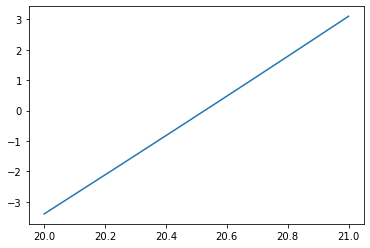

In [14]:
## tempo = variavel de busca
import matplotlib

# definindo chute inicial e invervalo de busca para o tempo 
tempo = 20
intervalo_busca = np.linspace(20,21,10000)
saida = np.empty(len(intervalo_busca))
saidaderivada = np.empty(len(intervalo_busca))
tam_busca = len(intervalo_busca)

## Calculando as funções Sdelta e f

def Calcular_Funcao(chute):
## busca binaria para encontrar o intervalo (i) a qual pertence o tempo de chute
  for i in range (0,n):
    if(t[i]<=tempo and tempo<=t[i+1]):
      indice = i
  Sdelta =  ( M[indice] / (6*h[indice+1]))* (t[indice+1]-chute)**3 + ( M[indice+1]/ (6*h[indice+1]) ) * (chute-t[indice])**3 + Ai[indice]*(chute-t[indice]) + Bi[indice]
  f = Sdelta-(100-2.3*10)
  return(f)


## Calcular a derivada da função
def Calcular_Derivada(chute):

  for i in range (0,n):
    if(t[i]<=tempo and tempo<=t[i+1]):
      indice = i
     
  derivada = -3*( M[indice] / (6*h[indice+1]))* (t[indice+1]-chute)**2 + 3* ( M[indice+1]/ (6*h[indice+1]) ) * (chute-t[indice])**2 + Ai[indice]
  return (derivada)


## Calculando a função f no intervalo de busca

for i in range (0,tam_busca):
  saida[i] = Calcular_Funcao(intervalo_busca[i])
  #print ("Valores de x ", intervalo_busca[i])

print("Valores da função f ", saida)

## Calculando a derivada da função f no intervalo de busca 
for i in range (0,tam_busca):
  saidaderivada[i] = Calcular_Derivada(intervalo_busca[i])

print ("Derivada de f ",saidaderivada)
## Teste de hipoteses do Teorema da Convexidade

Convexidade = False

if(Calcular_Funcao(intervalo_busca[0])*Calcular_Funcao(intervalo_busca[tam_busca-1])<0 and all(saidaderivada)!=0):
  Convexidade = True
  print (Convexidade,"O Intervalo de Busca Obedece o Teorema da Convexidade !")
else:
  Convexidade = False

matplotlib.pyplot.plot(intervalo_busca,saida)


# **Tarefa 2.1.2 - Resolvendo a Equação por Newton**

In [15]:
def Metodo_Newton (chute0,precisao):
  Xi = chute0
  cont = 0
  while(Calcular_Funcao(Xi+precisao)*Calcular_Funcao(Xi-precisao)>0):
    Xi = Xi - Calcular_Funcao(Xi)/Calcular_Derivada(Xi)
    cont = cont + 1 
    print("Iteração ",cont,"Valor de t ",Xi)
  return(Xi)

Resultado = Metodo_Newton(tempo, 1.e-10)

Zero = Calcular_Funcao(Resultado)
print(Zero)
print("Raiz de t : ", Resultado)

Iteração  1 Valor de t  20.53112287920868
Iteração  2 Valor de t  20.527526970319744
Iteração  3 Valor de t  20.527526735270225
1.4210854715202004e-14
Raiz de t :  20.527526735270225
